#                          SussexBudgetProductions Movie Data analysis 
                          
                          
 # Introduction:
 
 This is a movie dataset set analysis for Sussex budget productions to ensure a good return for the upcoming year. The dataset consist of various genre movies directed by multiple directors across the globe.I will be performing the exploratory data analysis and will provide my suggestion on the best director to acheive the targeted profit.
                          
                          

In [1]:
# Importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
# Reading the data from the movie_metadata CSV file and displaying the "Movie_data" dataframe

Movie_data=pd.read_csv('movie_metadata.csv')
Movie_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
# Display the concise summary of a dataframe

Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

# Data Cleaning



In data cleanup, I will be removing the duplicates and excluding the irrelevant fields and cleanse the data for analysis.

In [4]:
# Checking the duplicate rows in the DataFrame
Movie_data[Movie_data.duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000


In [5]:
# deduplicate the rows
Movie_data.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
# Deleting the fields that are not vital for analysis

Movie_data=Movie_data.drop(['color','num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','num_user_for_reviews','content_rating','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes','num_voted_users','cast_total_facebook_likes','plot_keywords','facenumber_in_poster','actor_1_name','actor_3_name','movie_imdb_link'],axis=1)


Convert the units of gross and budget to millions and limiting the decimal places to 3. Creating a new column named profit which is a difference of gross and budget.

In [7]:
Movie_data['budget']=round(Movie_data['budget']/1000000,3)
Movie_data['gross']=round(Movie_data['gross']/1000000,3)
Movie_data.insert(8,column='profit',value=Movie_data['gross']-Movie_data['budget'])


In [8]:
# Identifying the null values 

Movie_data.isnull().sum(axis=0).sort_values(ascending=0)

profit           1152
gross             884
budget            492
title_year        108
director_name     104
language           12
country             5
genres              0
movie_title         0
imdb_score          0
dtype: int64

In [9]:
# Removing the null values of budget, language and gross

Movie_data=Movie_data.dropna(axis='index',how='any',subset=['budget','language','gross'])

In [10]:
# Grouping the data by language
Movie_data.groupby('language').language.count().sort_values(ascending=False)

language
English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Danish           3
Hebrew           3
Thai             3
Indonesian       2
Aboriginal       2
Dari             2
Czech            1
Vietnamese       1
Aramaic          1
Telugu           1
Swedish          1
Bosnian          1
Russian          1
Romanian         1
Arabic           1
Icelandic        1
Dzongkha         1
None             1
Mongolian        1
Maya             1
Filipino         1
Hungarian        1
Kazakh           1
Zulu             1
Name: language, dtype: int64

In [11]:
# End of data cleaning

# Exploratory Data Analysis

Filtering the dataframe based on three conditions

a) Limiting to english language movies 
b) The title year of the movie is >= 2000 
c) The movie budget within $1.5 million
 


In [12]:
Movie_data=Movie_data[(Movie_data['language']=='English') & (Movie_data['title_year']>=2000) & (Movie_data['budget']<=1.5)]

In [13]:
# Sorting the profit by highest value

Movie_data=Movie_data.sort_values('profit',ascending=False)

In [14]:
Movie_data.describe()

,gross,budget,title_year,profit,imdb_score
count,166.000000,166.000000,166.000000,166.000000,166.000000
mean,4.055940,0.696042,2006.843373,3.359898,6.480120
std,12.361117,0.470724,4.427139,12.366385,0.908293
min,0.001000,0.000000,2000.000000,-1.499000,3.300000
25%,0.050000,0.250000,2003.000000,-0.684750,6.100000
50%,0.270000,0.625000,2006.000000,-0.079500,6.600000
75%,1.728250,1.000000,2011.000000,1.259500,7.100000
max,107.917000,1.500000,2015.000000,107.902000,8.400000


Creating a new dataframe that consist of the top 10 directors based on highest profit

In [15]:
Top10_Directors = Movie_data.sort_values(by='profit',ascending=False).head(10)

# Grouping and displying the new dataframe

Top10_Directors=Top10_Directors[['director_name','genres','movie_title','budget','gross','profit','imdb_score','title_year','language','country']]
Top10_Directors.reset_index(drop=True,inplace=True)
Top10_Directors

,director_name,genres,movie_title,budget,gross,profit,imdb_score,title_year,language,country
0,Oren Peli,Horror,Paranormal Activity,0.015,107.917,107.902,6.3,2007.0,English,USA
1,James Wan,Horror|Mystery|Thriller,Saw,1.200,55.153,53.953,7.7,2004.0,English,USA
2,James Wan,Fantasy|Horror|Mystery|Thriller,Insidious,1.500,53.991,52.491,6.8,2010.0,English,USA
3,William Brent Bell,Horror,The Devil Inside,1.000,53.245,52.245,4.2,2012.0,English,USA
4,Jared Hess,Comedy,Napoleon Dynamite,0.400,44.541,44.141,6.9,2004.0,English,USA
5,Alex Kendrick,Drama|Romance,Fireproof,0.500,33.451,32.951,6.5,2008.0,English,USA
6,Levan Gabriadze,Horror|Mystery|Thriller,Unfriended,1.000,31.537,30.537,5.7,2014.0,English,USA
7,Chris Kentis,Adventure|Biography|Drama|Horror|Thriller,Open Water,0.500,30.501,30.001,5.7,2003.0,English,USA
8,Travis Cluff,Horror|Thriller,The Gallows,0.100,22.758,22.658,4.2,2015.0,English,USA
9,Jay Chandrasekhar,Comedy|Crime|Mystery,Super Troopers,1.200,18.488,17.288,7.1,2001.0,English,USA


/var/folders/w5/vb_g61bn0w70x79vntykpzch0000gn/T/ipykernel_12220/2704813996.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  xtickNames=plt.setp(ax1,xticklabels=Top10_Directors['director_name'])


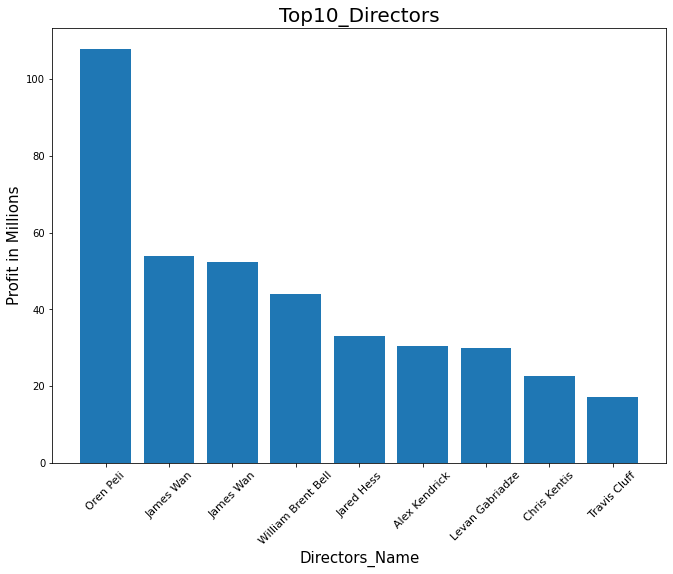

In [16]:
# Bar chart for the Top10_Directors 

fig,ax1=plt.subplots(figsize=(11,8))
plt.bar(Top10_Directors['director_name'],Top10_Directors['profit'])
xtickNames=plt.setp(ax1,xticklabels=Top10_Directors['director_name'])
plt.title("Top10_Directors",fontsize = 20)
plt.setp(xtickNames,rotation=45,fontsize=11)
plt.xlabel('Directors_Name',fontsize=15)
plt.ylabel('Profit in Millions',fontsize=15)
plt.show()


The bar chart illustrates the top 10 directors name with highest profit from the year 2000.

In [25]:
Top5=Top10_Directors.nlargest(5,'profit')[['director_name','genres','profit','imdb_score']].set_index('director_name')

# Hypothesis Testing

The hypothesis testing is performed for the top 5 and the last 5 directors from the top 10 directors to conclude which directors are needed according to the production house's profit requirement. 

Independent Variable: Top10 Directors
Dependent Variable: Profit

Based on my assumption, the null hypothesis(Ho) is the last 5 directors will generate more profit than top 5 directors with the given £1.5 million budget. The alternate hypothesis(H1) is the first 5 directors will generate more profit than the last 5 with the given £1.5 million budget.


To find the mean, standard deviation and count for Top 5 and last 5 directors

In [28]:
# Top5 Directors
Top5=Top10_Directors['profit'].head(5)
Top5_mean=Top5.mean()
Top5_std=Top5.std()
Top5_count=Top5.count()
print("The mean of the top 5 directors is {}".format(Top5_mean))
print("The std of the top 5 directors is {}".format(Top5_std))
print("The count of the top 5 directors is {}".format(Top5_count))

The mean of the top 5 directors is 62.14640000000001
The std of the top 5 directors is 25.865834778719204
The count of the top 5 directors is 5


In [32]:
# Last5 directors
Last5=Top10_Directors['profit'].tail(5)
Last5_mean=Last5.mean()
Last5_std=Last5.std()
Last5_count=Last5.count()
print("The mean of the last 5 data is {}".format(Last5_mean))
print("The std of the last 5 data is {}".format(Last5_std))
print("The count of the last 5 data is {}".format(Last5_count))

The mean of the last 5 data is 26.687
The std of the last 5 data is 6.51185138804626
The count of the last 5 data is 5


In [33]:
ttest_value=stats.ttest_ind_from_stats(Top5_mean,Top5_std,Top5_count,Last5_mean,Last5_std,Last5_count,equal_var=False)
one_tail_diff_p=ttest_value.pvalue/2
one_tail_diff_p

0.017677445356692145

Considering the p-value is less than 0.5, the null hypothesis can be rejected and the alternate hypothesis will be accepted.The alternate hypothesis of the top 5 directors will generate more profit than the last 5 directors.

# Summary

As a result of the exploratory data analysis, I recommend that SussexBudgetProductions house to produce the film with the Top5 directors to achieve the most profit with the given budget of £1.5 million.